# How to Debug Flask Applications in VS Code

## How to create a basic web service using flask and then step through and fully debug the code inside the VS Code integrated development environment

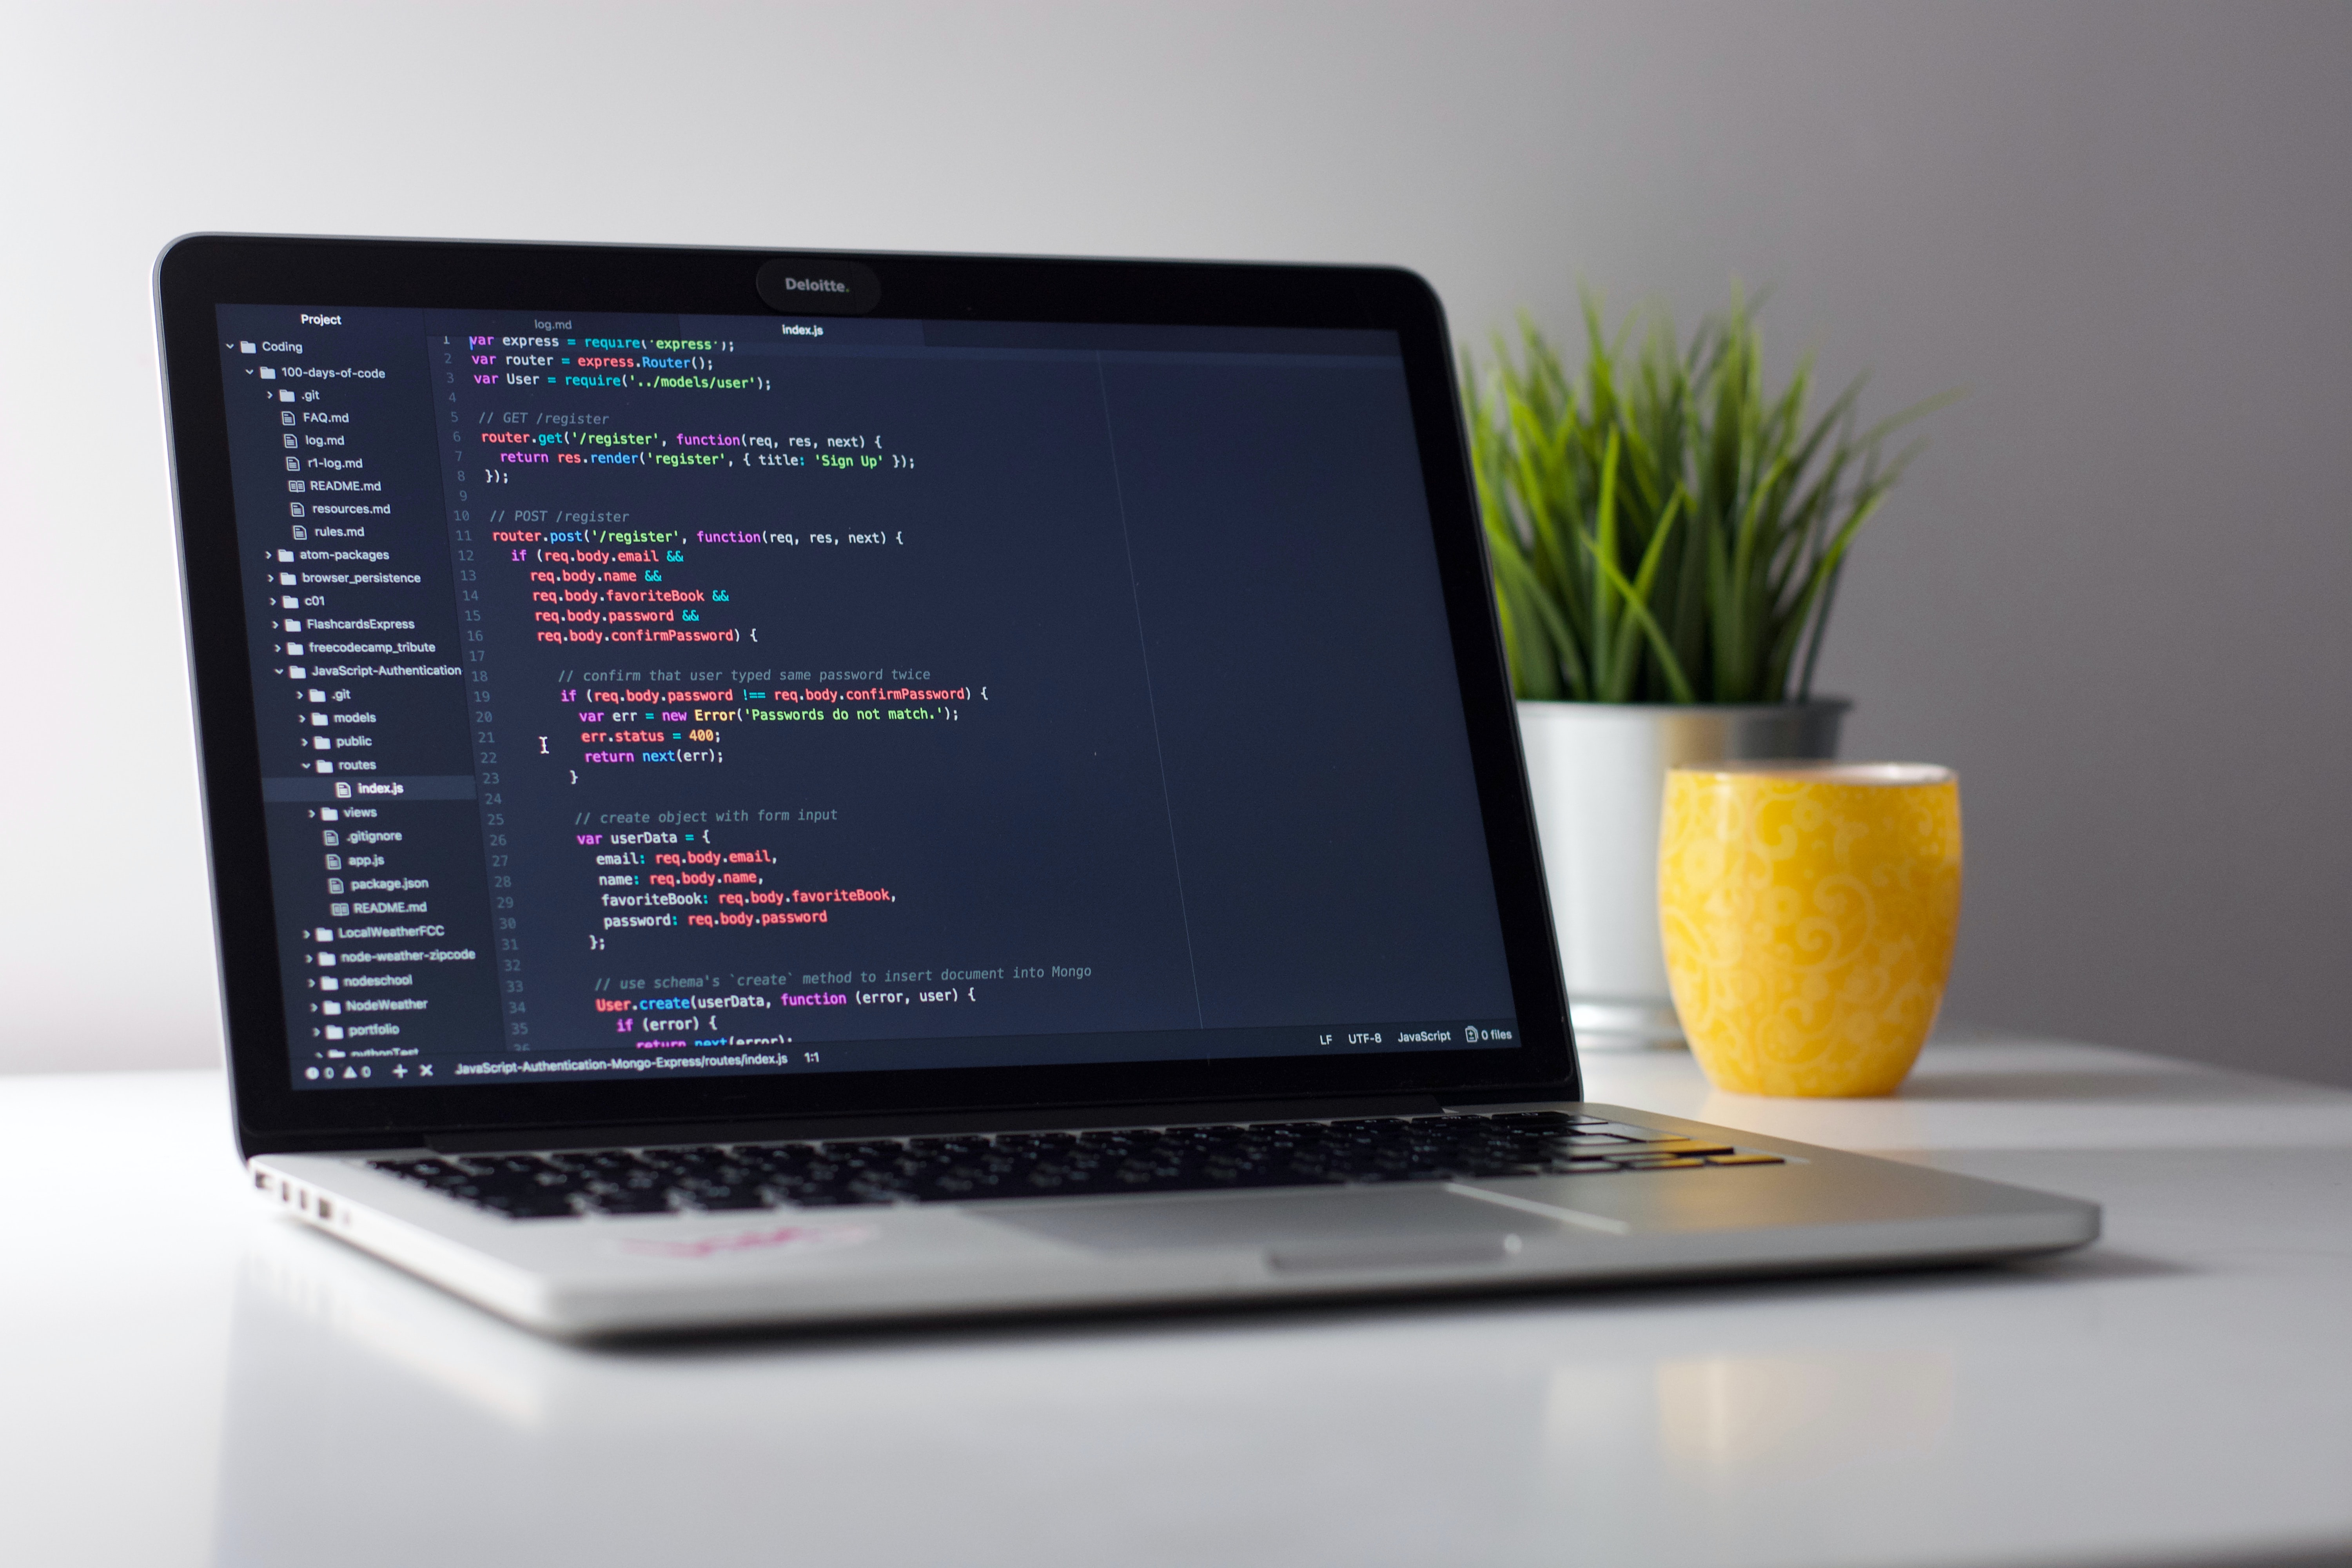
Photo by <a href="https://unsplash.com/@clemhlrdt?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Clément Hélardot</a> on <a href="https://unsplash.com/s/photos/computer?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Step 1: Develop a Basic Flask Application

The first stage is to create a basic web service using flask. There are many online tutorials to show you how to do this including this one that I have found particularly useful - https://programminghistorian.org/en/lessons/creating-apis-with-python-and-flask.

For the purposes of this tutorial the basic flask app we will be using to explore how to debug flask apps is as follows -

In [ ]:
import flask
from flask import request, jsonify

app = flask.Flask(__name__)
app.config["DEBUG"] = True

# Create some test data for our catalog in the form of a list of dictionaries.
data_science_books = [
    {'id': 0,
     'title': 'Data Science (MIT Press Essential Knowledge series)',
     'authors': 'John D Kelleher and Brendan Tierney',
     'price': '£9.45',
     'published': '6 Apr 2018',
     'url': 'https://www.amazon.co.uk/Data-Science-Press-Essential-Knowledge/dp/0262535432/ref=sr_1_3?keywords=data+science&qid=1636616265&sr=8-3'},
    {'id': 0,
     'title': 'Data Science For Dummies, 2nd Edition (For Dummies (Computer/Tech))',
     'authors': 'Lillian Pierson',
     'price': '15.65',
     'published': '24 Feb 2017',
     'url': 'https://www.amazon.co.uk/Data-Science-Dummies-2nd-Computers/dp/1119327636/ref=sr_1_4?keywords=data+science&qid=1636616265&sr=8-4'},
    {'id': 0,
     'title': 'Data Science from Scratch: First Principles with Python',
     'authors': 'Joel Grus',
     'price': '£29.99',
     'published': '30 Apr 2019',
     'url': 'https://www.amazon.co.uk/Data-Science-Scratch-Joel-Grus/dp/1492041130/ref=sr_1_5?keywords=data+science&qid=1636616265&sr=8-5'}
]


@app.route('/', methods=['GET'])
def home():
    return '''<h1>Data Science Library Reference</h1>
<p>A test web service for accessing a libray of data science books and manuals.</p>'''


# A route to return all of the available entries in our catalog.
@app.route('/api/v1/resources/books/all', methods=['GET'])
def api_all():
    return jsonify(data_science_books)

app.run()

You should be creating your flask app inside the VS Code environment and your should create a single .py file and call it ``app.py``.

There are ways to modify the configuration to use a different name to ``app.py`` for your code file but as you are only allowed a single Python file inside a flask web app (in which you can create as many web services as you like) there does not seem much point in changing it.

If you have been following along so far your VS Code environment and Python code should look like this -

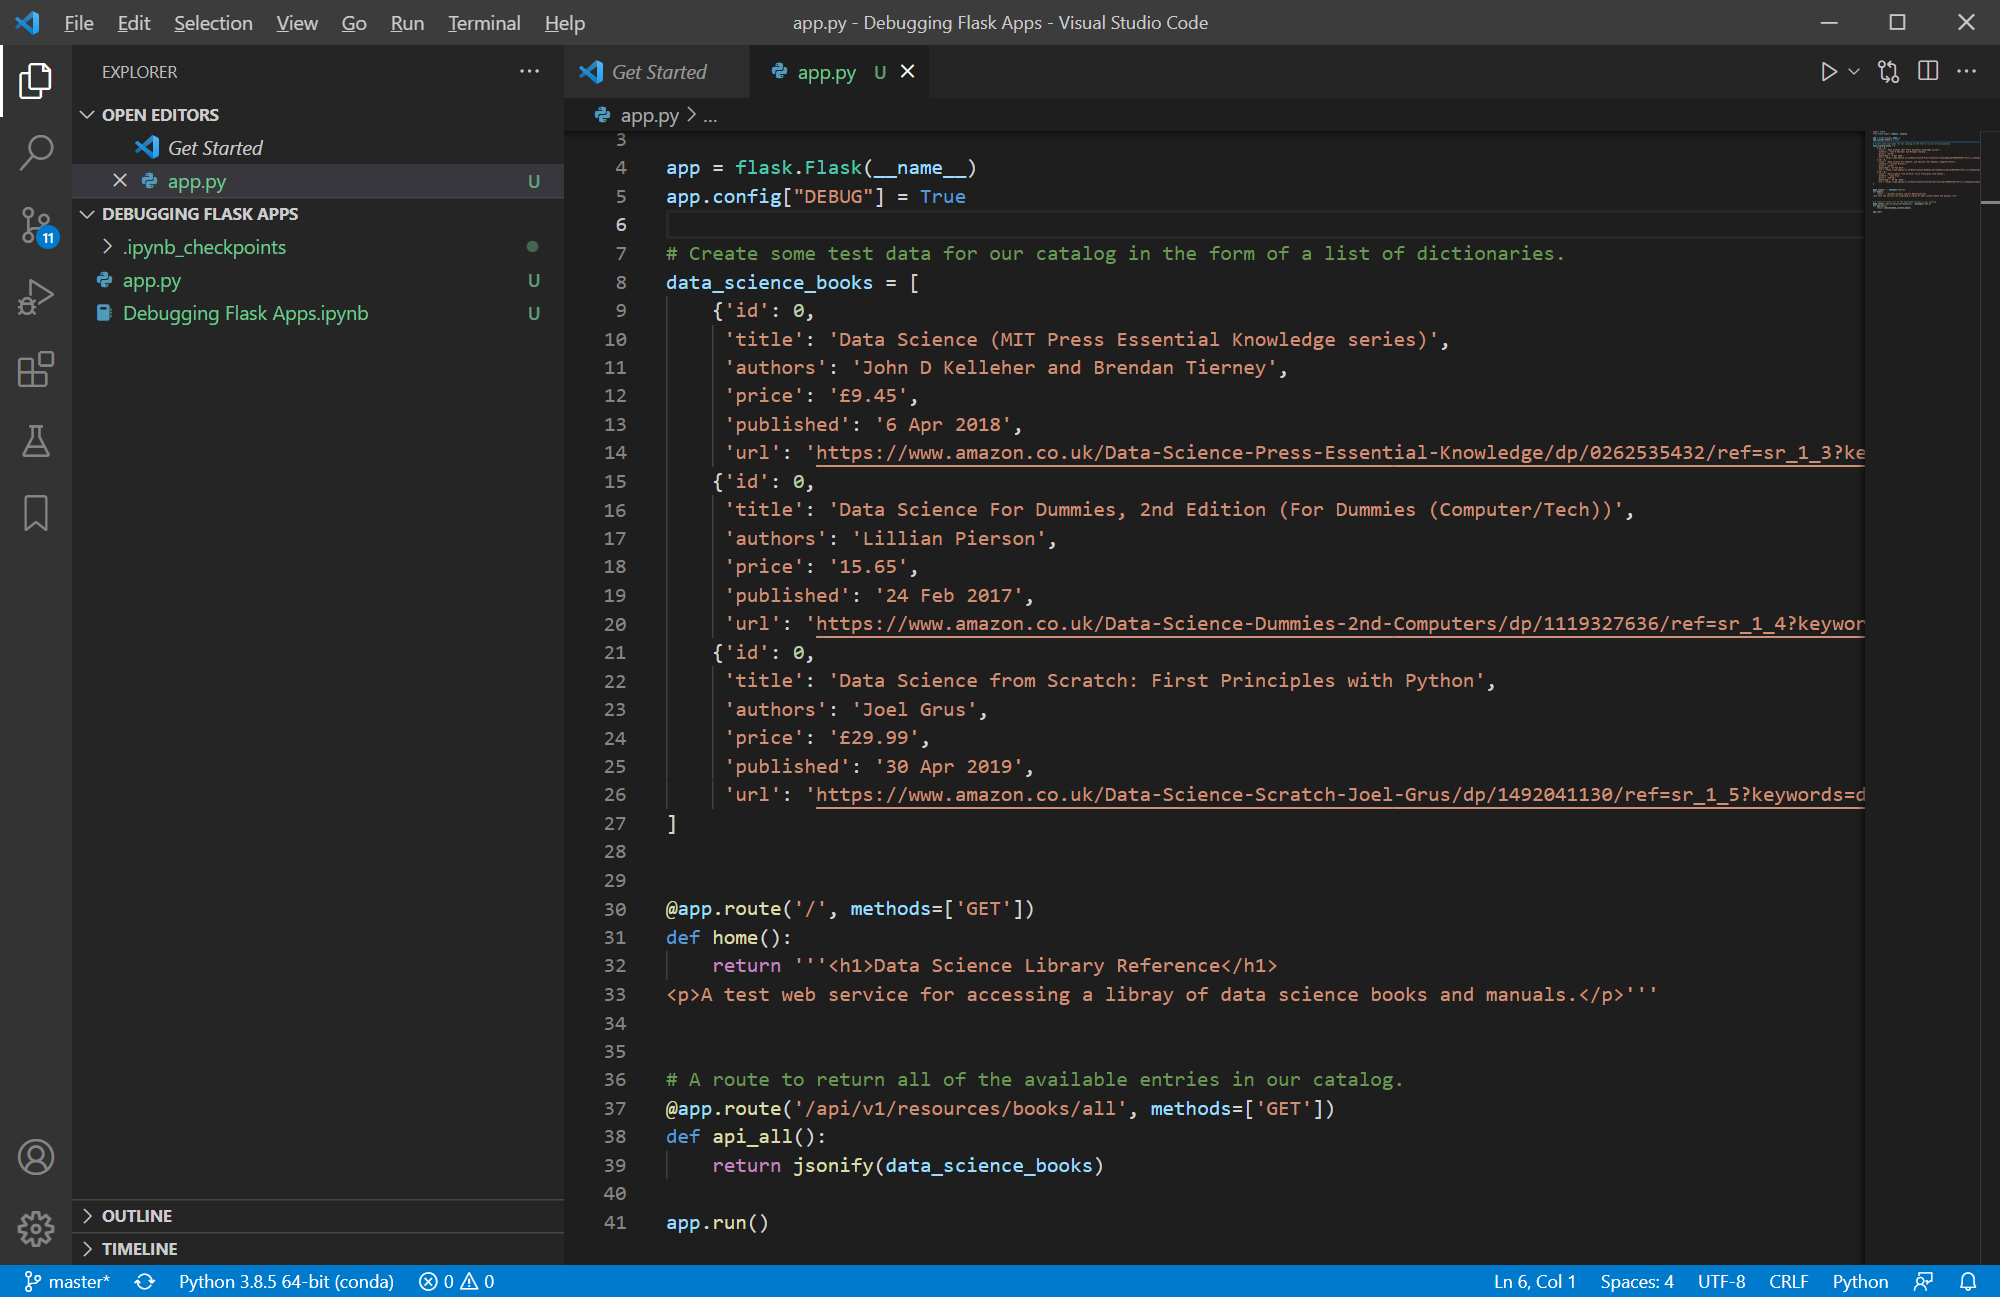

### Step 2: Create and configure a launch.json configuration file

If you click on the "Run and Debug" icon on the left hand side of the IDE or alternatively type Ctrl+Shift+D you will see the "RUN AND DEBUG" window.

Now click on the "create a launch.json file" link and when prompted to "Select a debug configuration" choose "Python File Debug the currently active Python file".

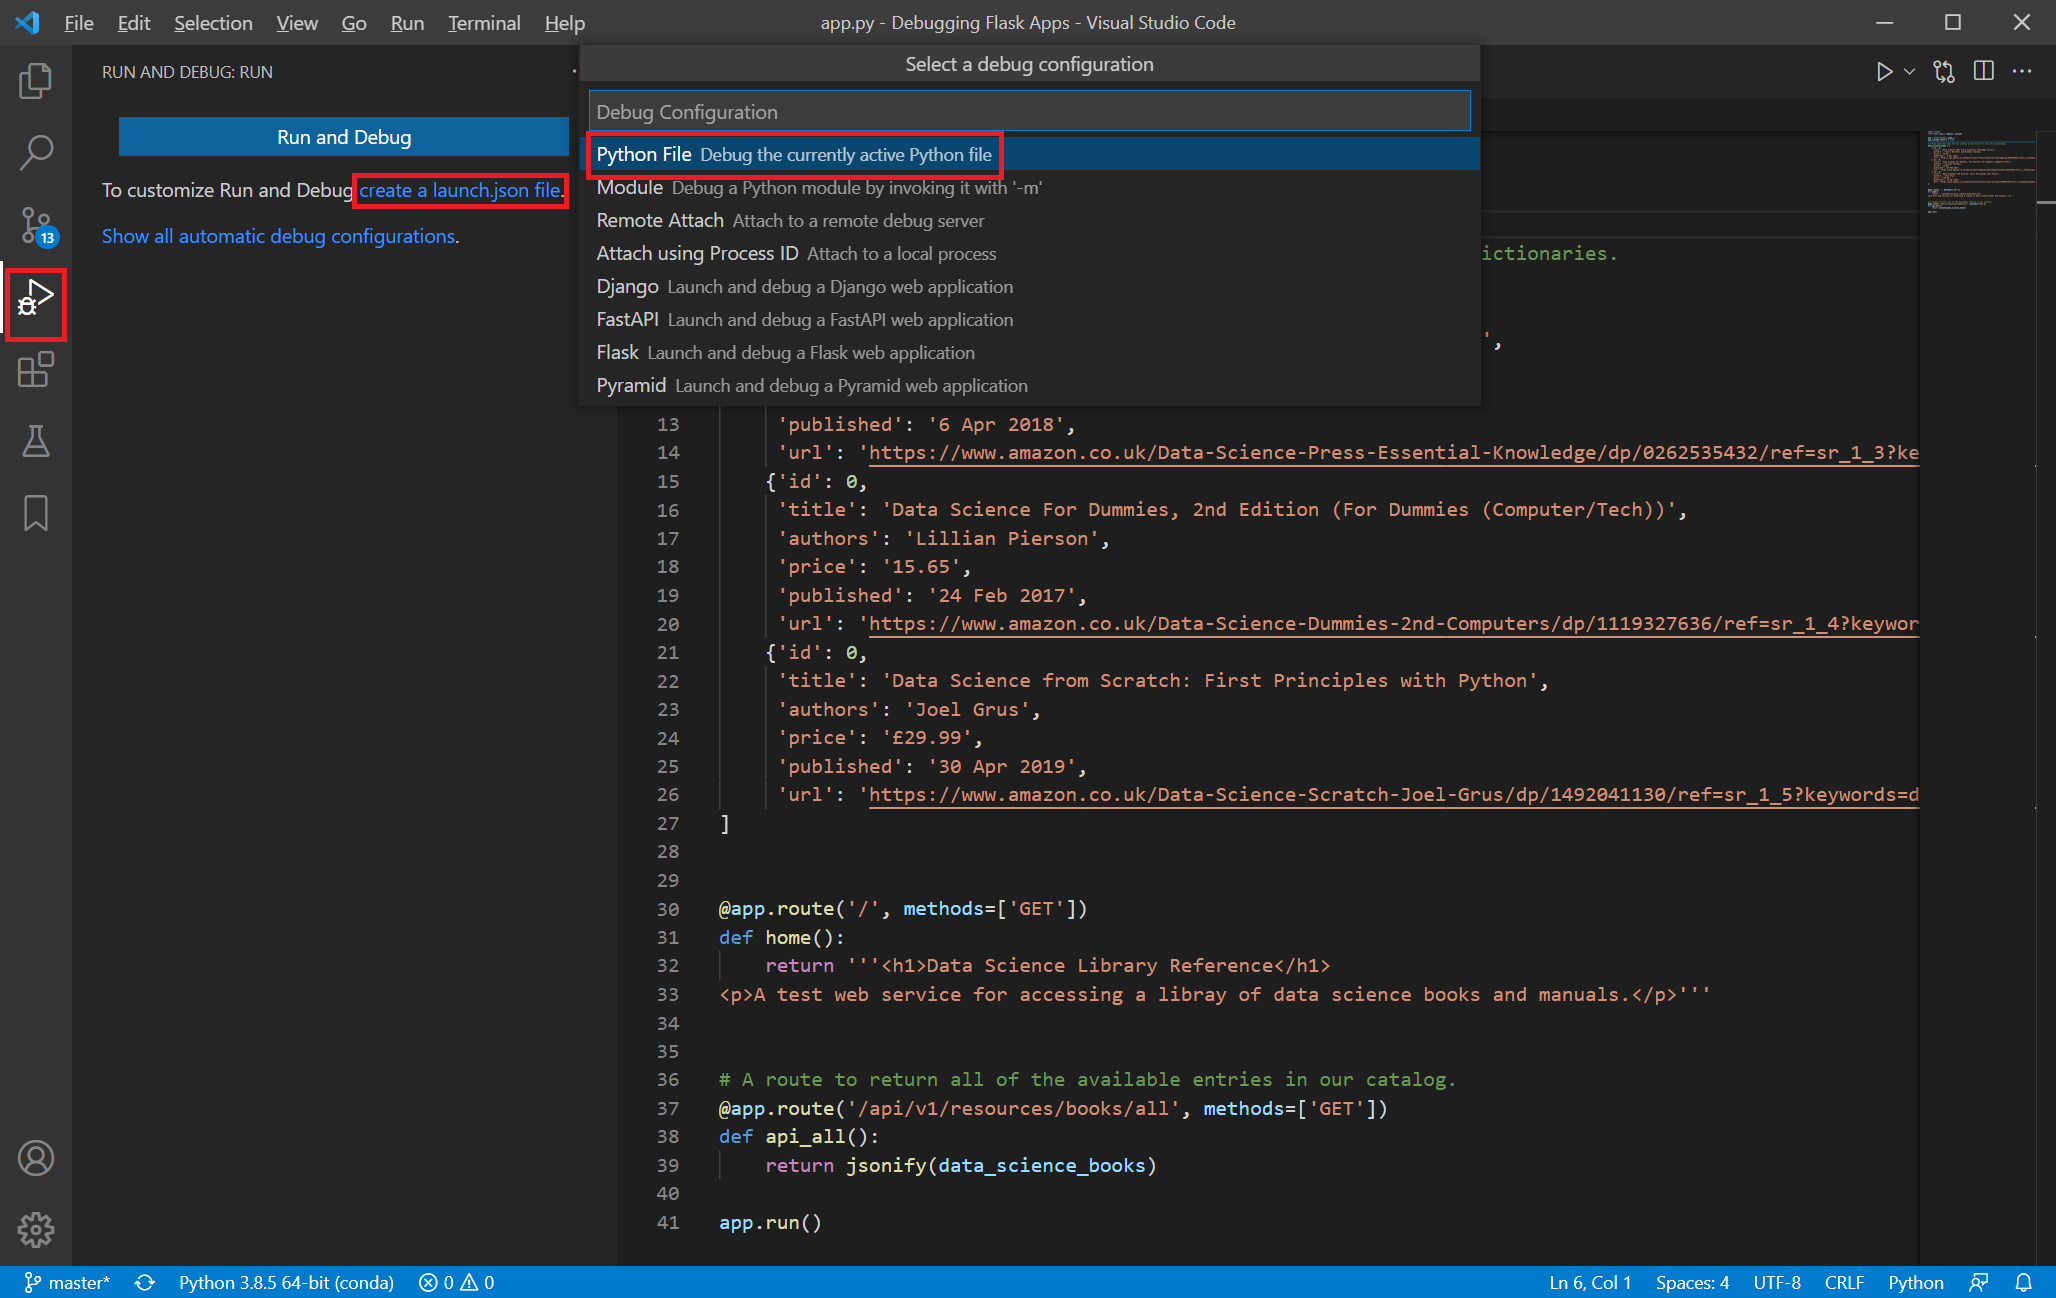

VS Code will now automatically create a launch.json configuration file for you that is prepopulated with some basic settings.

The first thing to do is to remove the comments as these cause an error / warning later on when the flask app is executed -

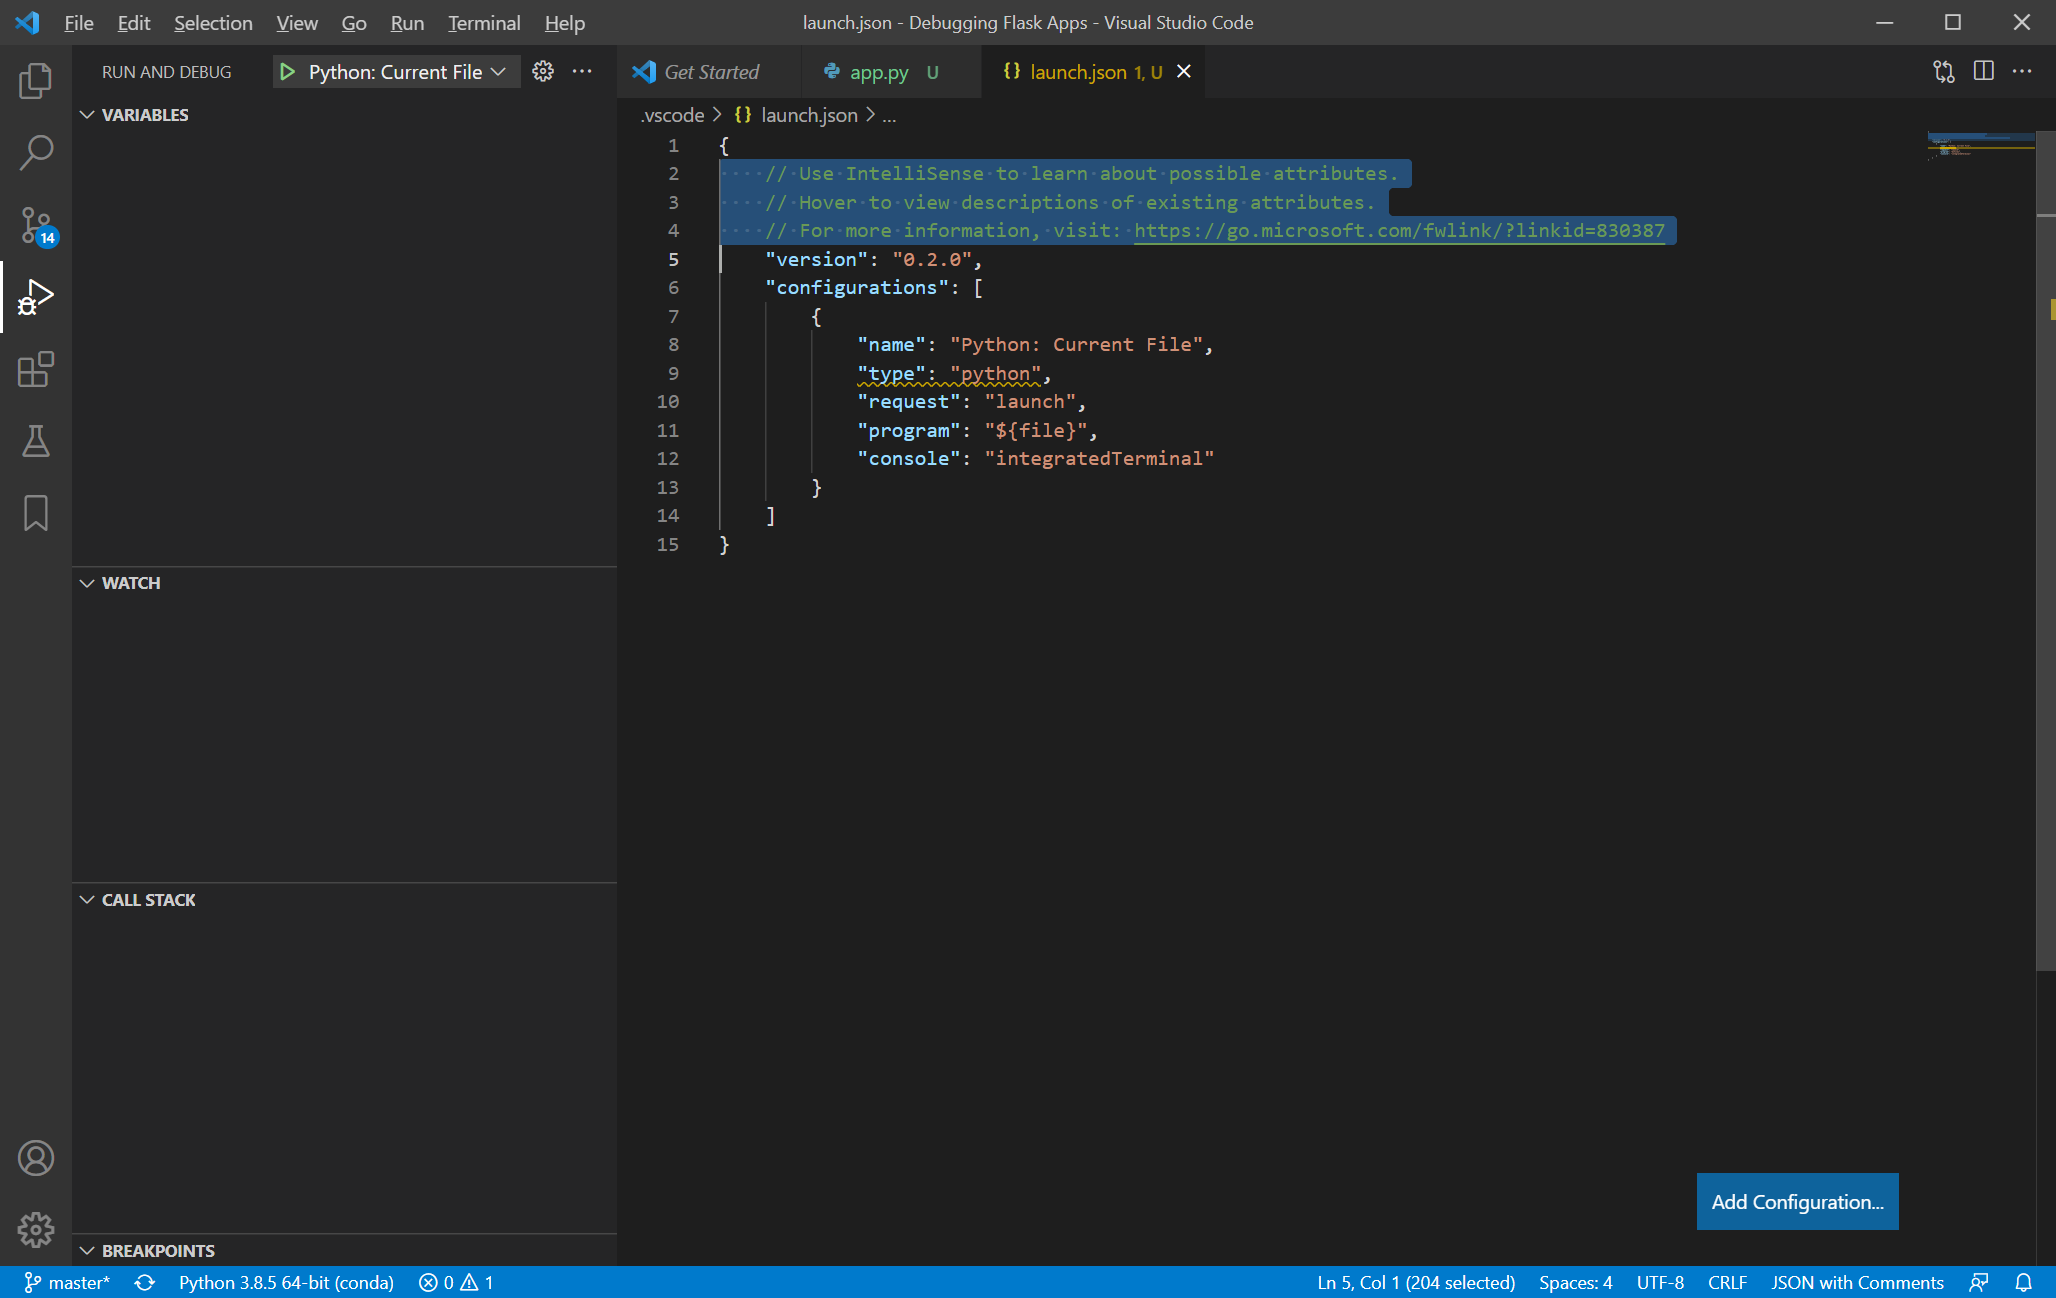

The next step is the most critical. When VS Code creates the launch.json file and the associated configuration it does not include the necessary config to tell the environemnt and the web server where to find the conda environment and this must be added manually or otherwise debugging will never work inside VS Code.

1. Have a look on your computer for your Anaconda folder which will contain a file called ``_conda.exe``
2. Create a new line of configuration in launch.json for a parameter called ``"python.condaPath"`` with a value that points to the correct path

The completed launch.json file should look like this -

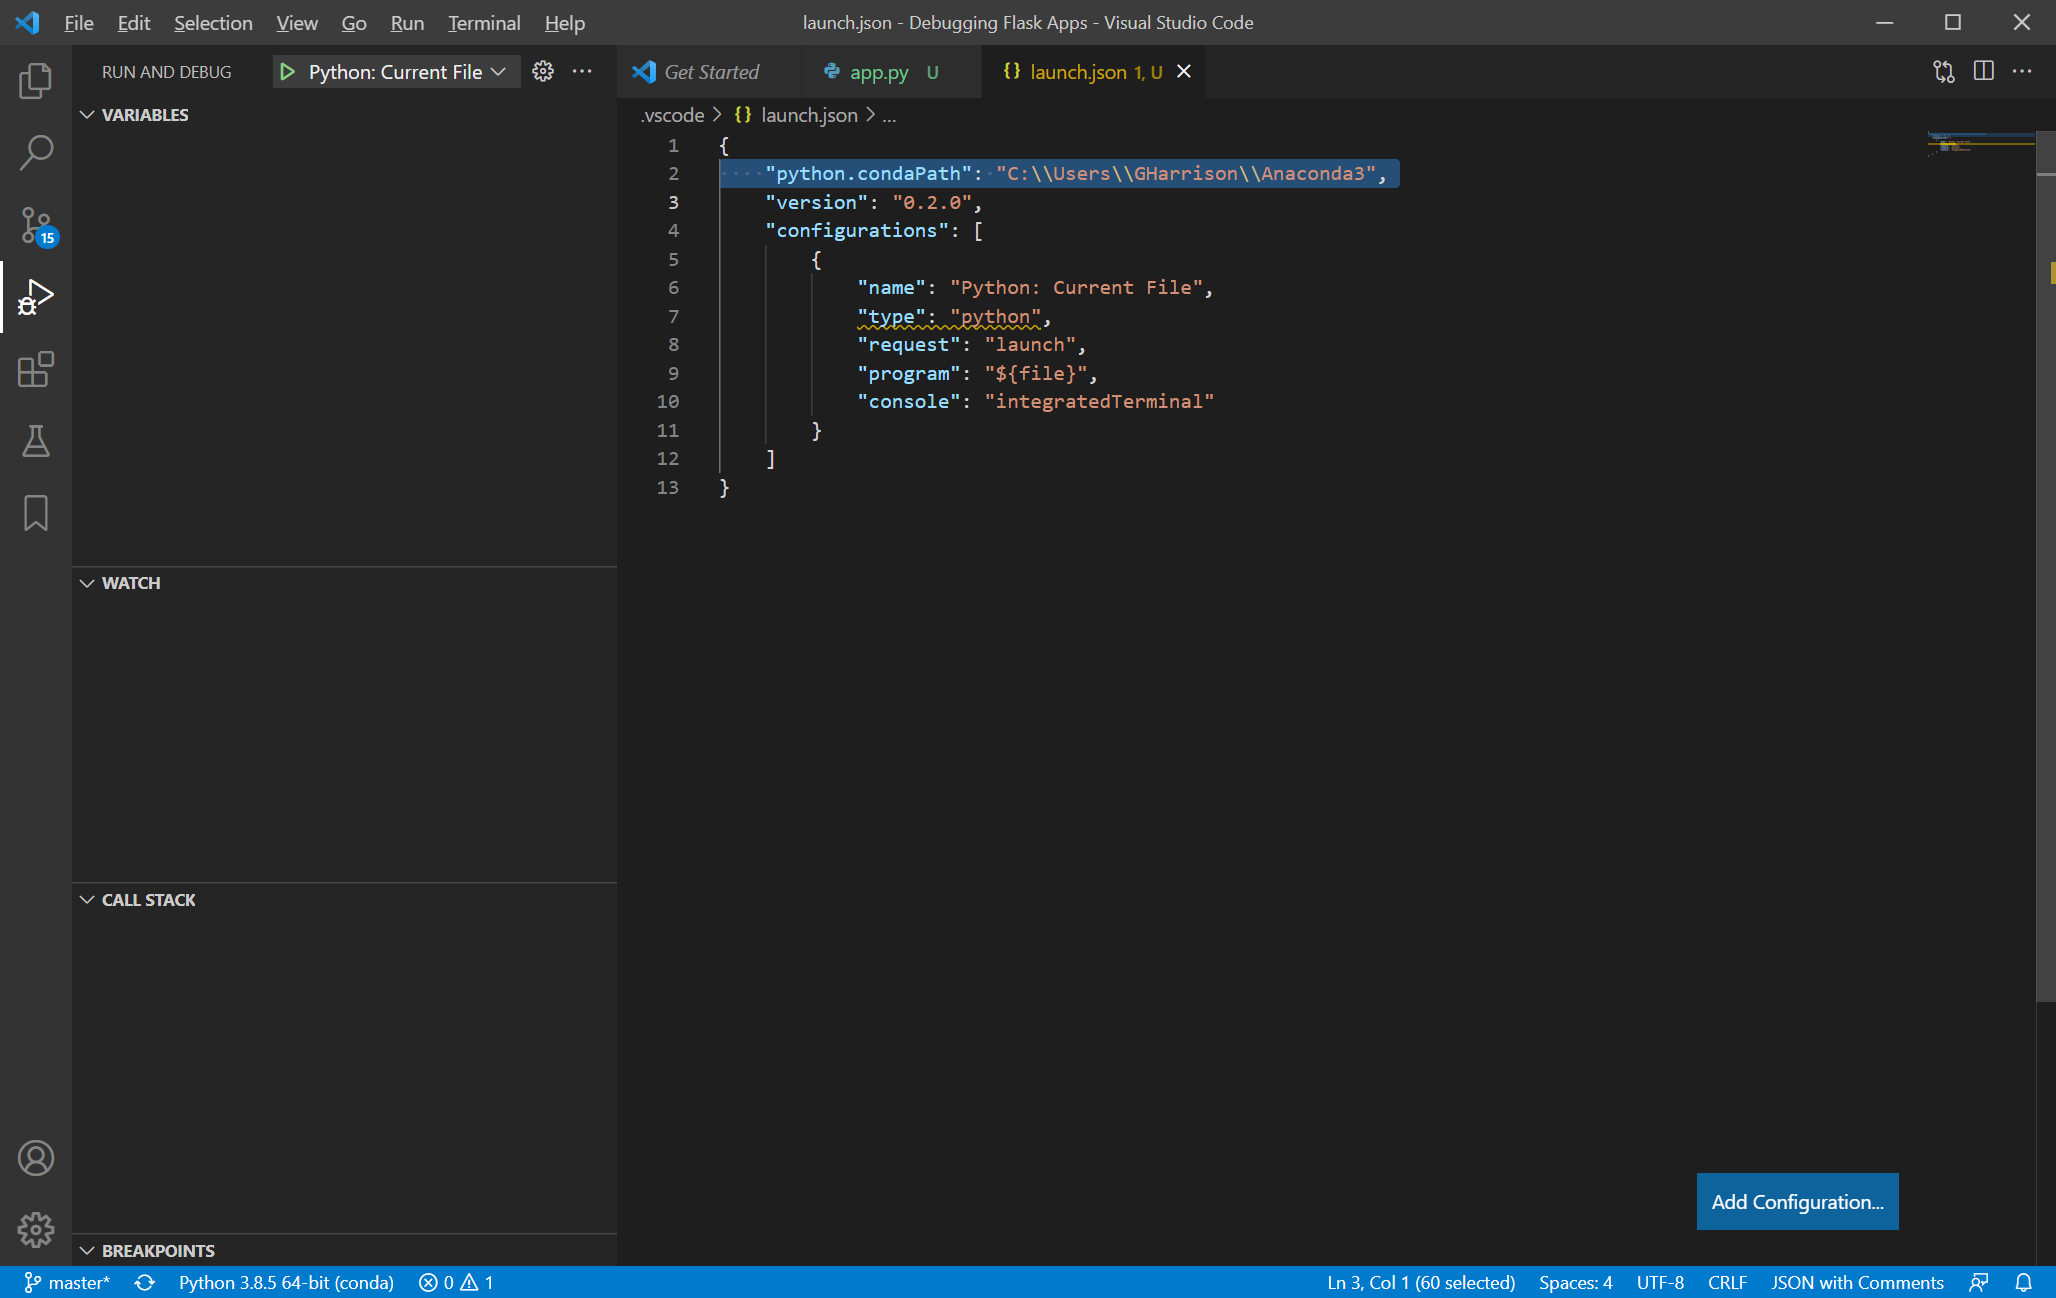

### Step 3: Start the Debugger

The next step is to go back into the code file and to click in the gutter in the editor to create some break points in the code. In the example below I have clicked on lines 33 and 39 -

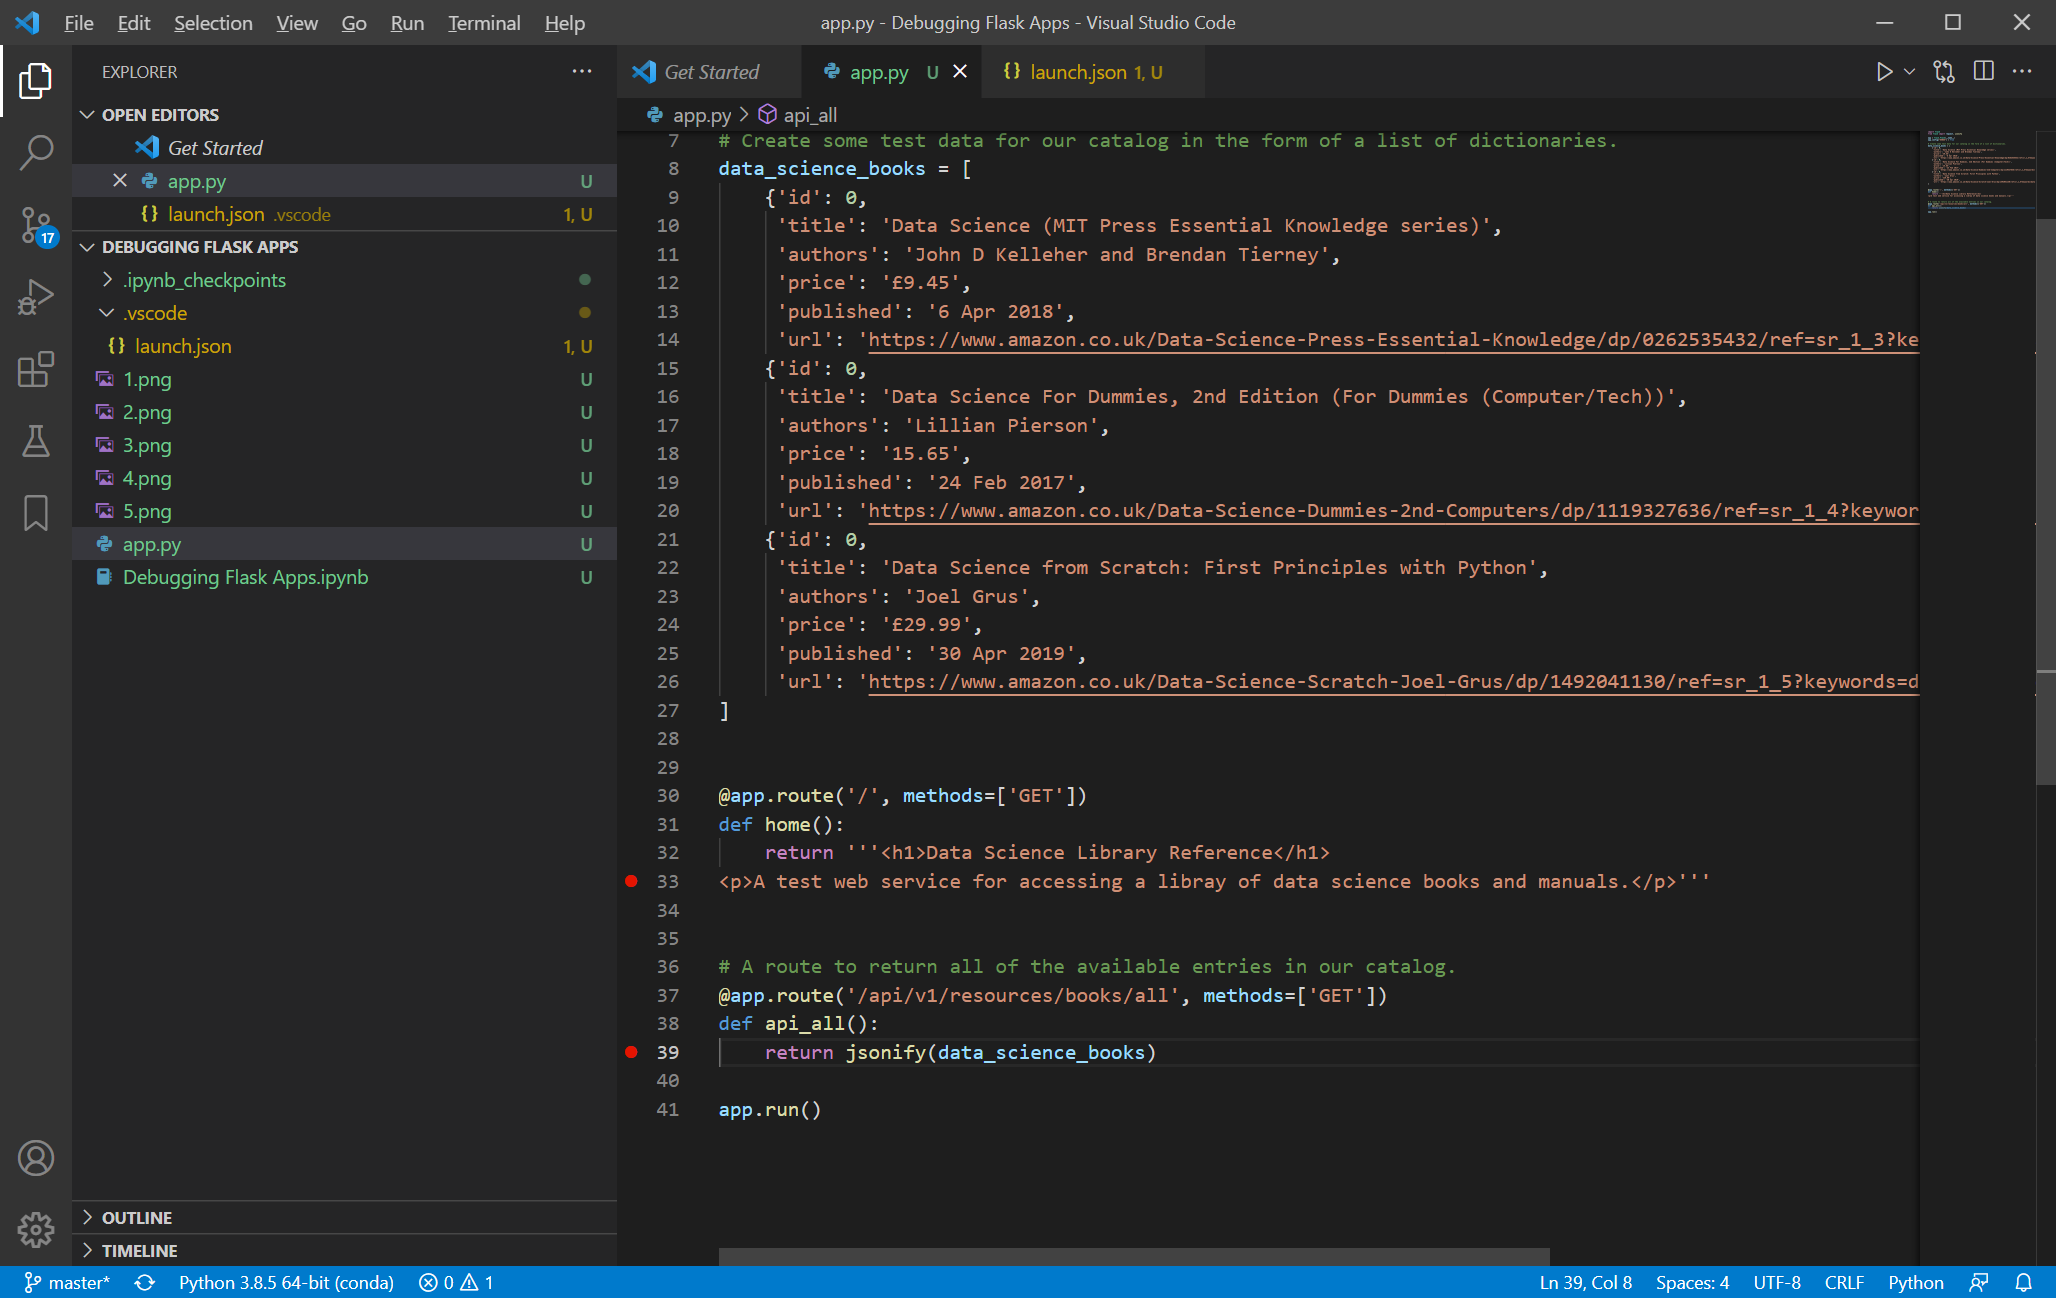

Now go back into the "Run and Debug" window and click on the green arrow next to "Python: Current File" to start the debugging session -

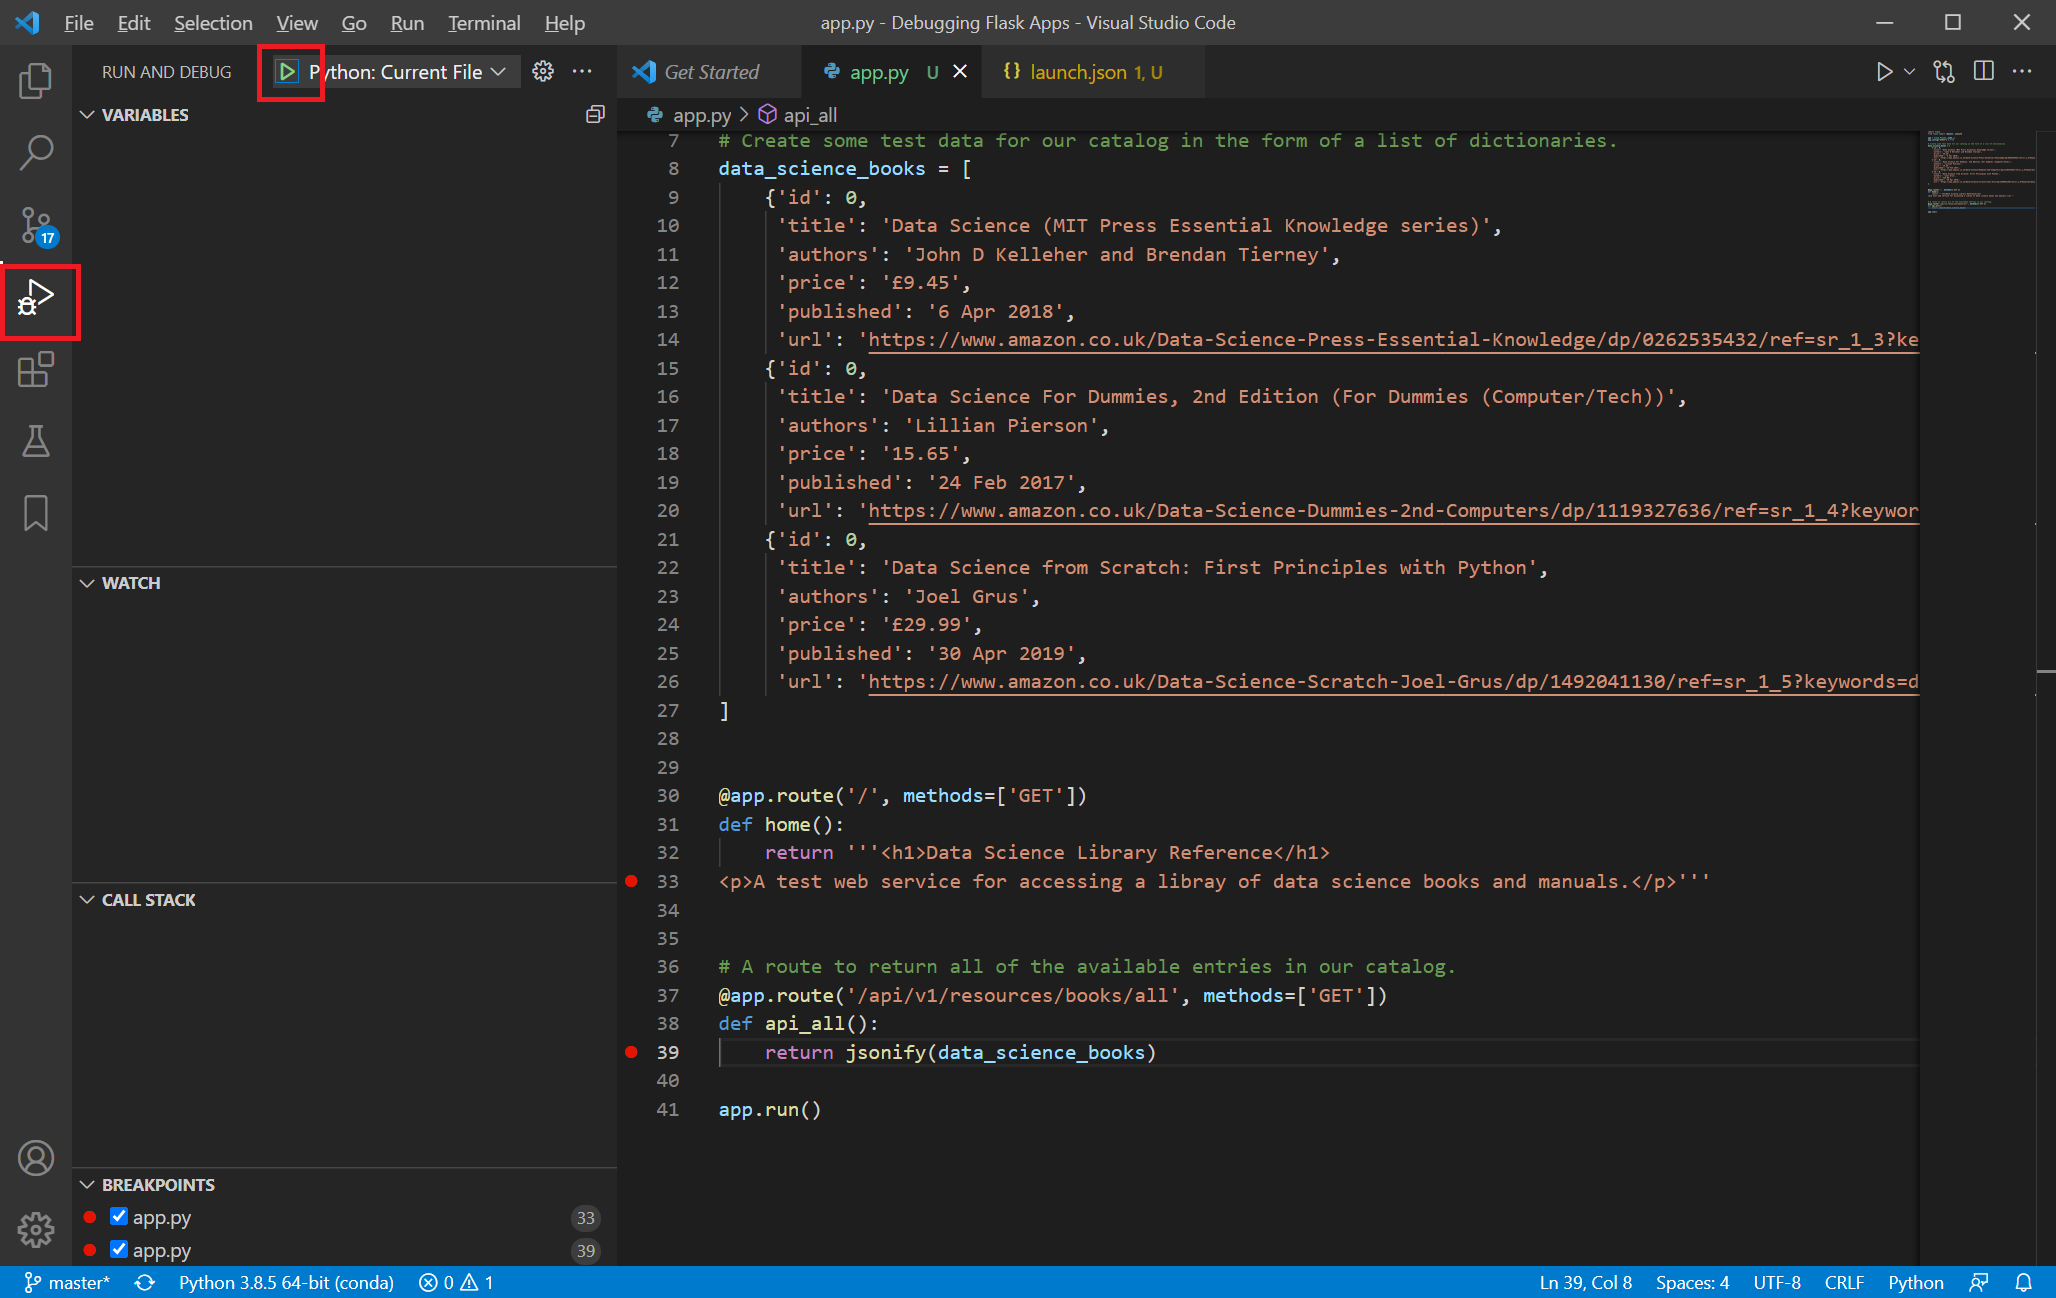

It is possible that you will get a "Exception has occure: SystemExit message" when you start the debugger but this is not critical and will not stop you from debugging your code.

Simply click on the blue "Play" button in the debug toolbar and the debugging session will continue -

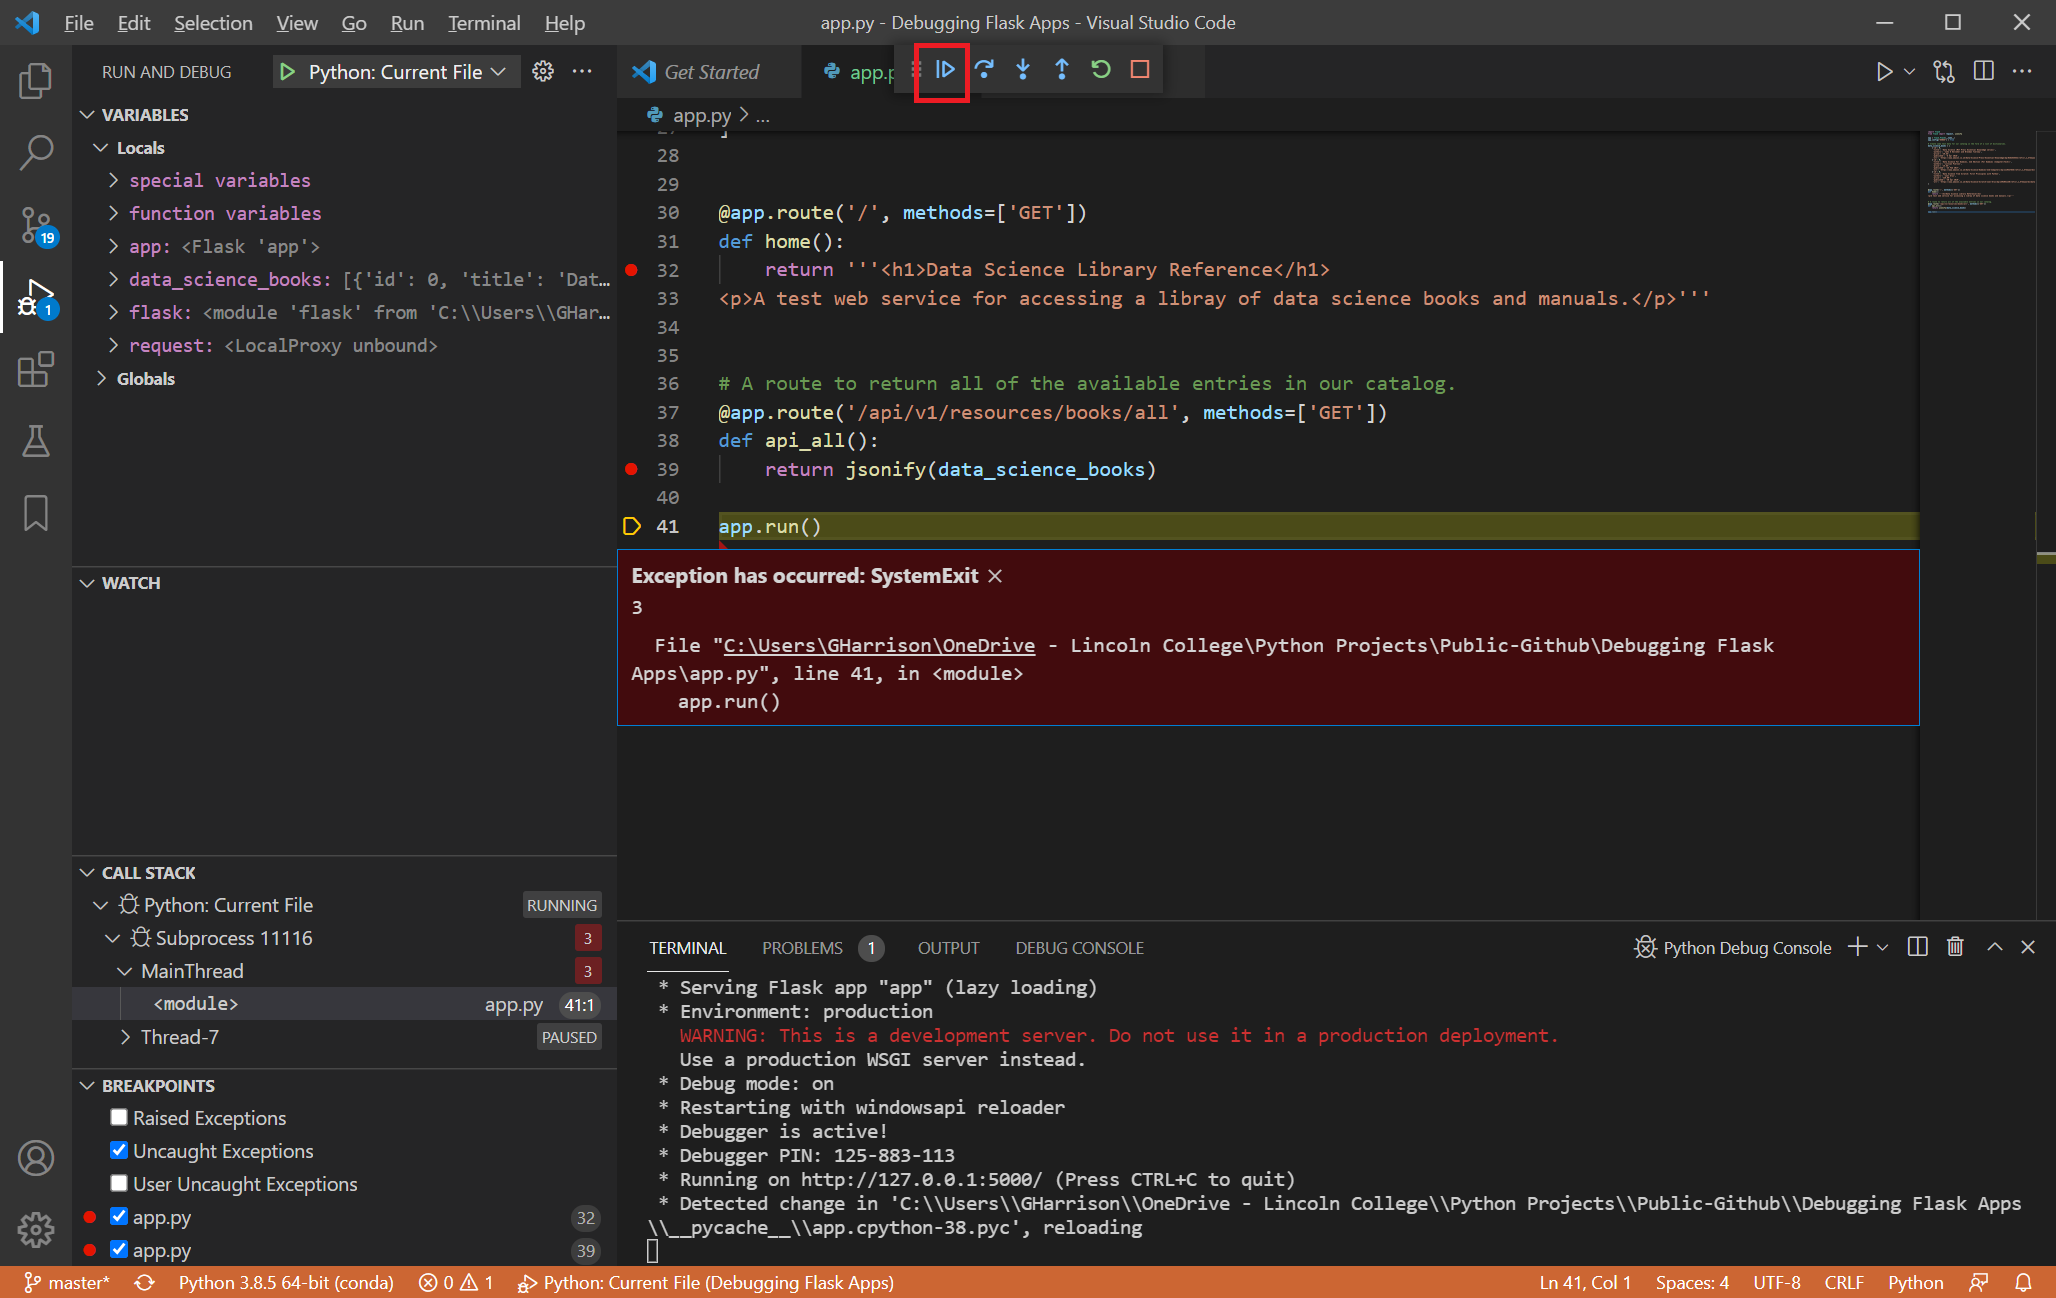

If everything has worked the last message you will get in the TERMINAL window will be -

``* Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)``

### Step 4: Call the Web Service

You now need to open up a web browser and type ``http://127.0.0.1:5000/`` into the URL to invoke the web service that is now running inside the debugger and the VS Code IDE -

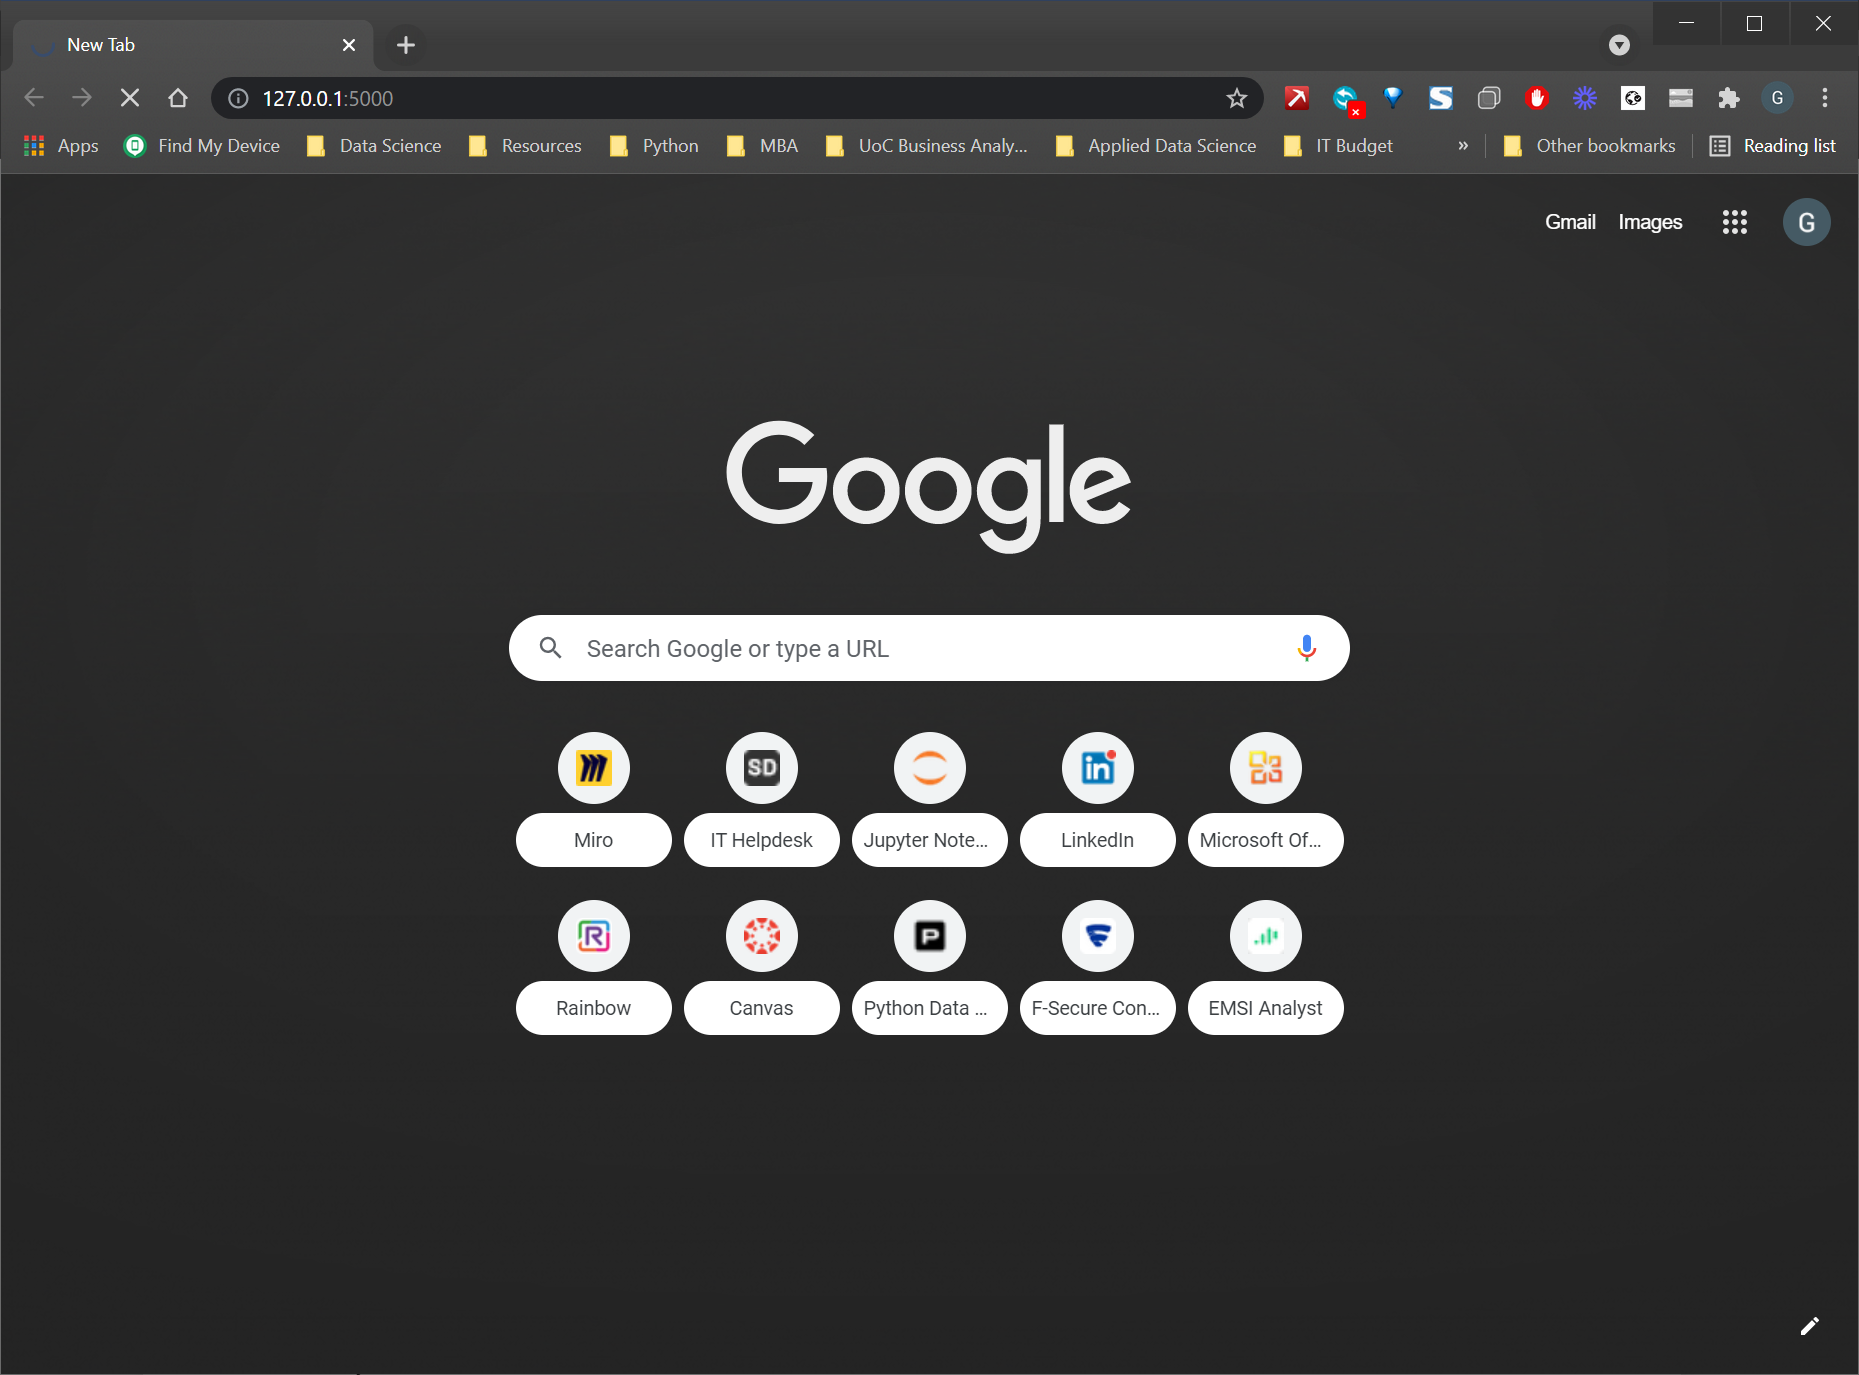

As soon as you press the ``return`` key you will see the following -
1. The browser call has invoked the web service
2. In VS Code the web service has been called and has paused in the debugger at the point where you added the break point
3. You can now step through and debug your code using the VS Code debug toolbar

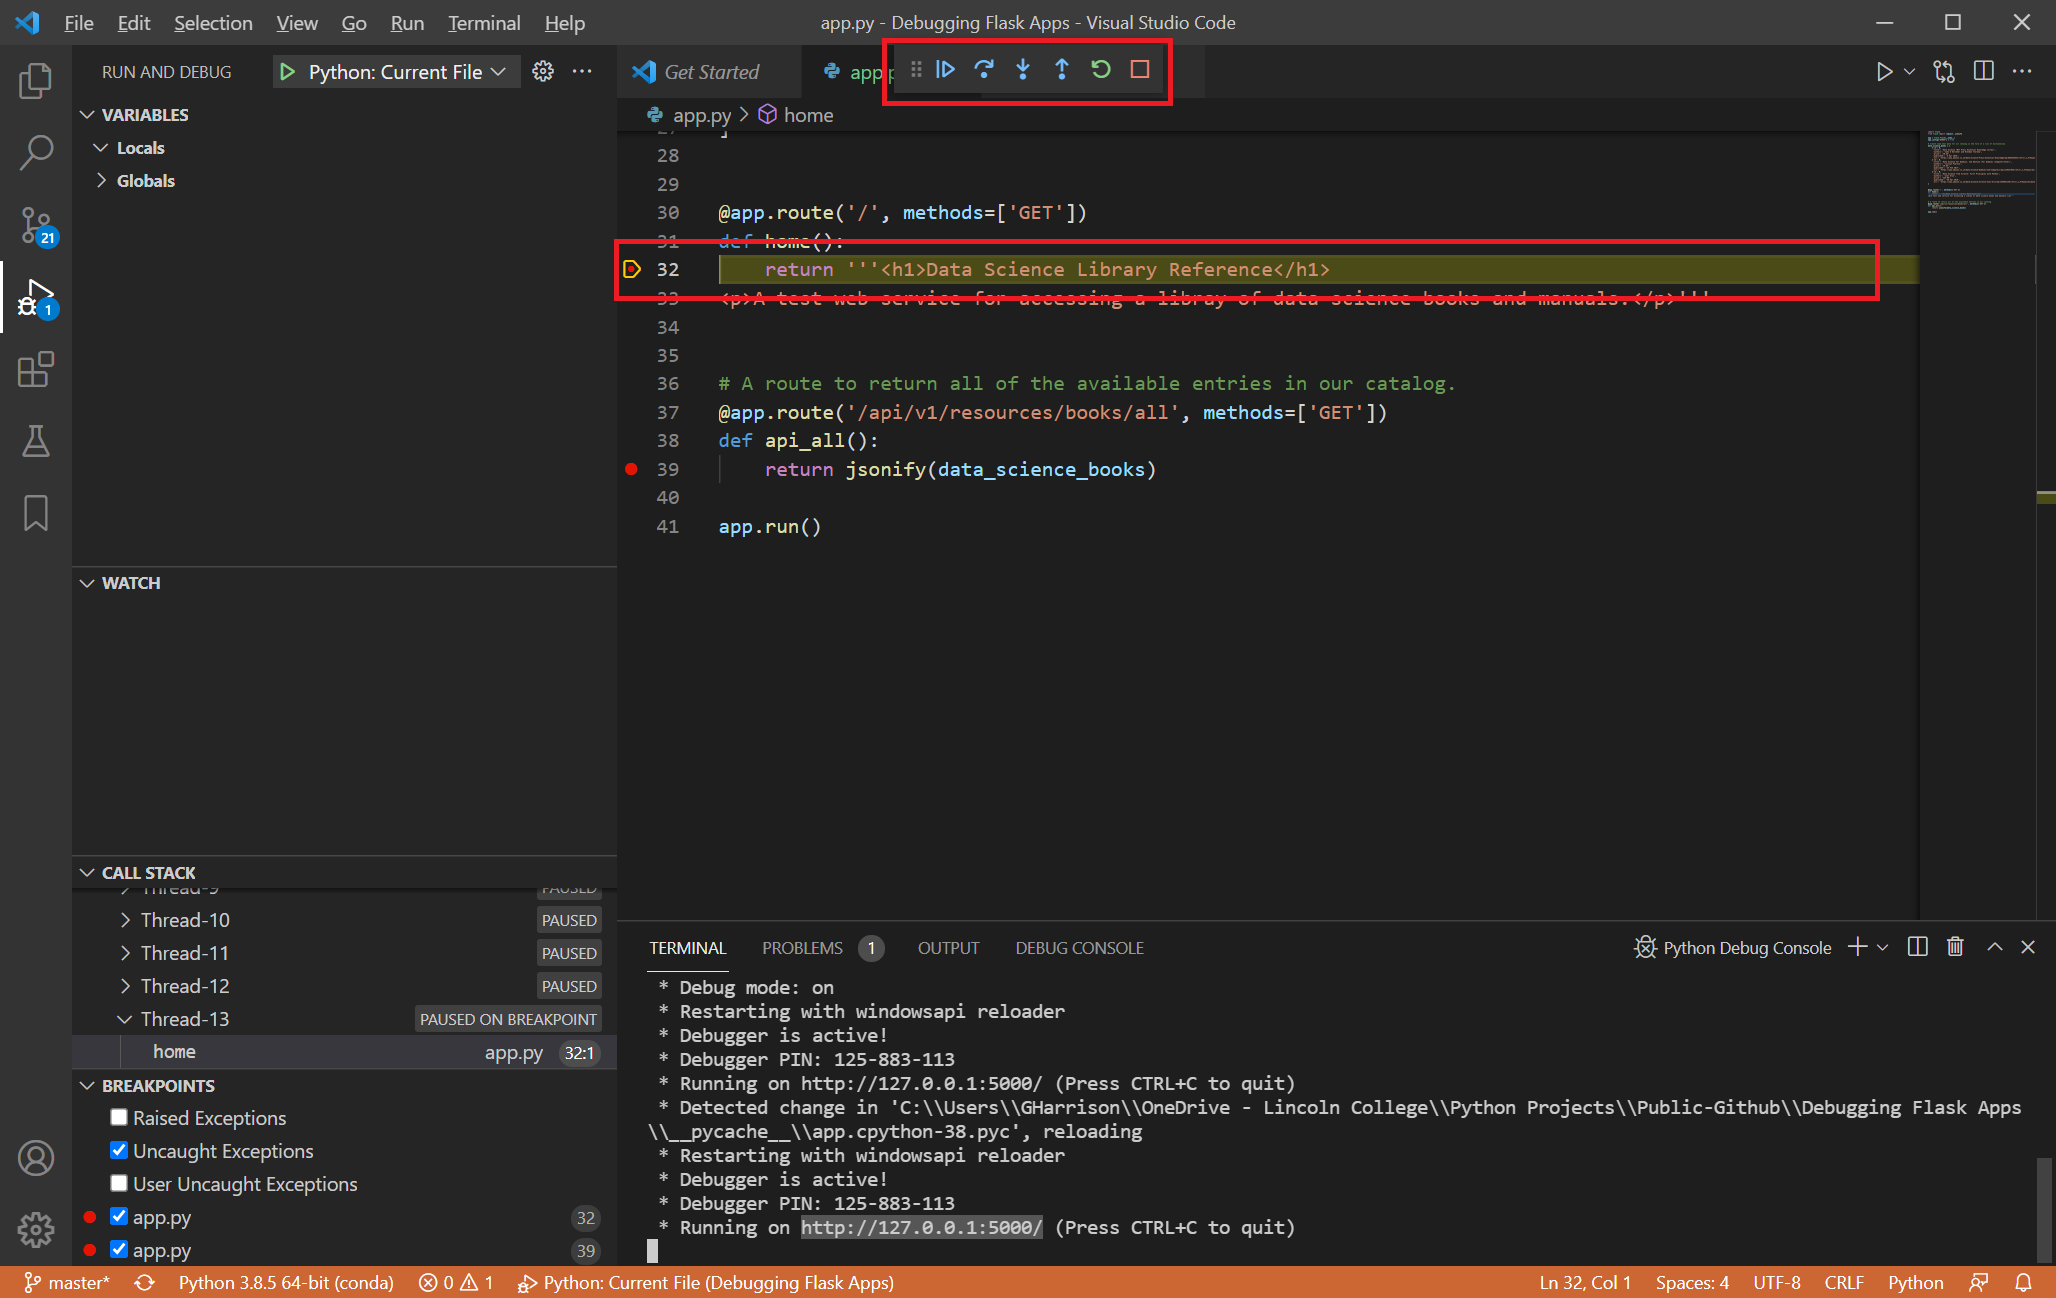

As you step through the code and exit the web service function the output from the web service will be returned to the web browser that invoked and called the service -

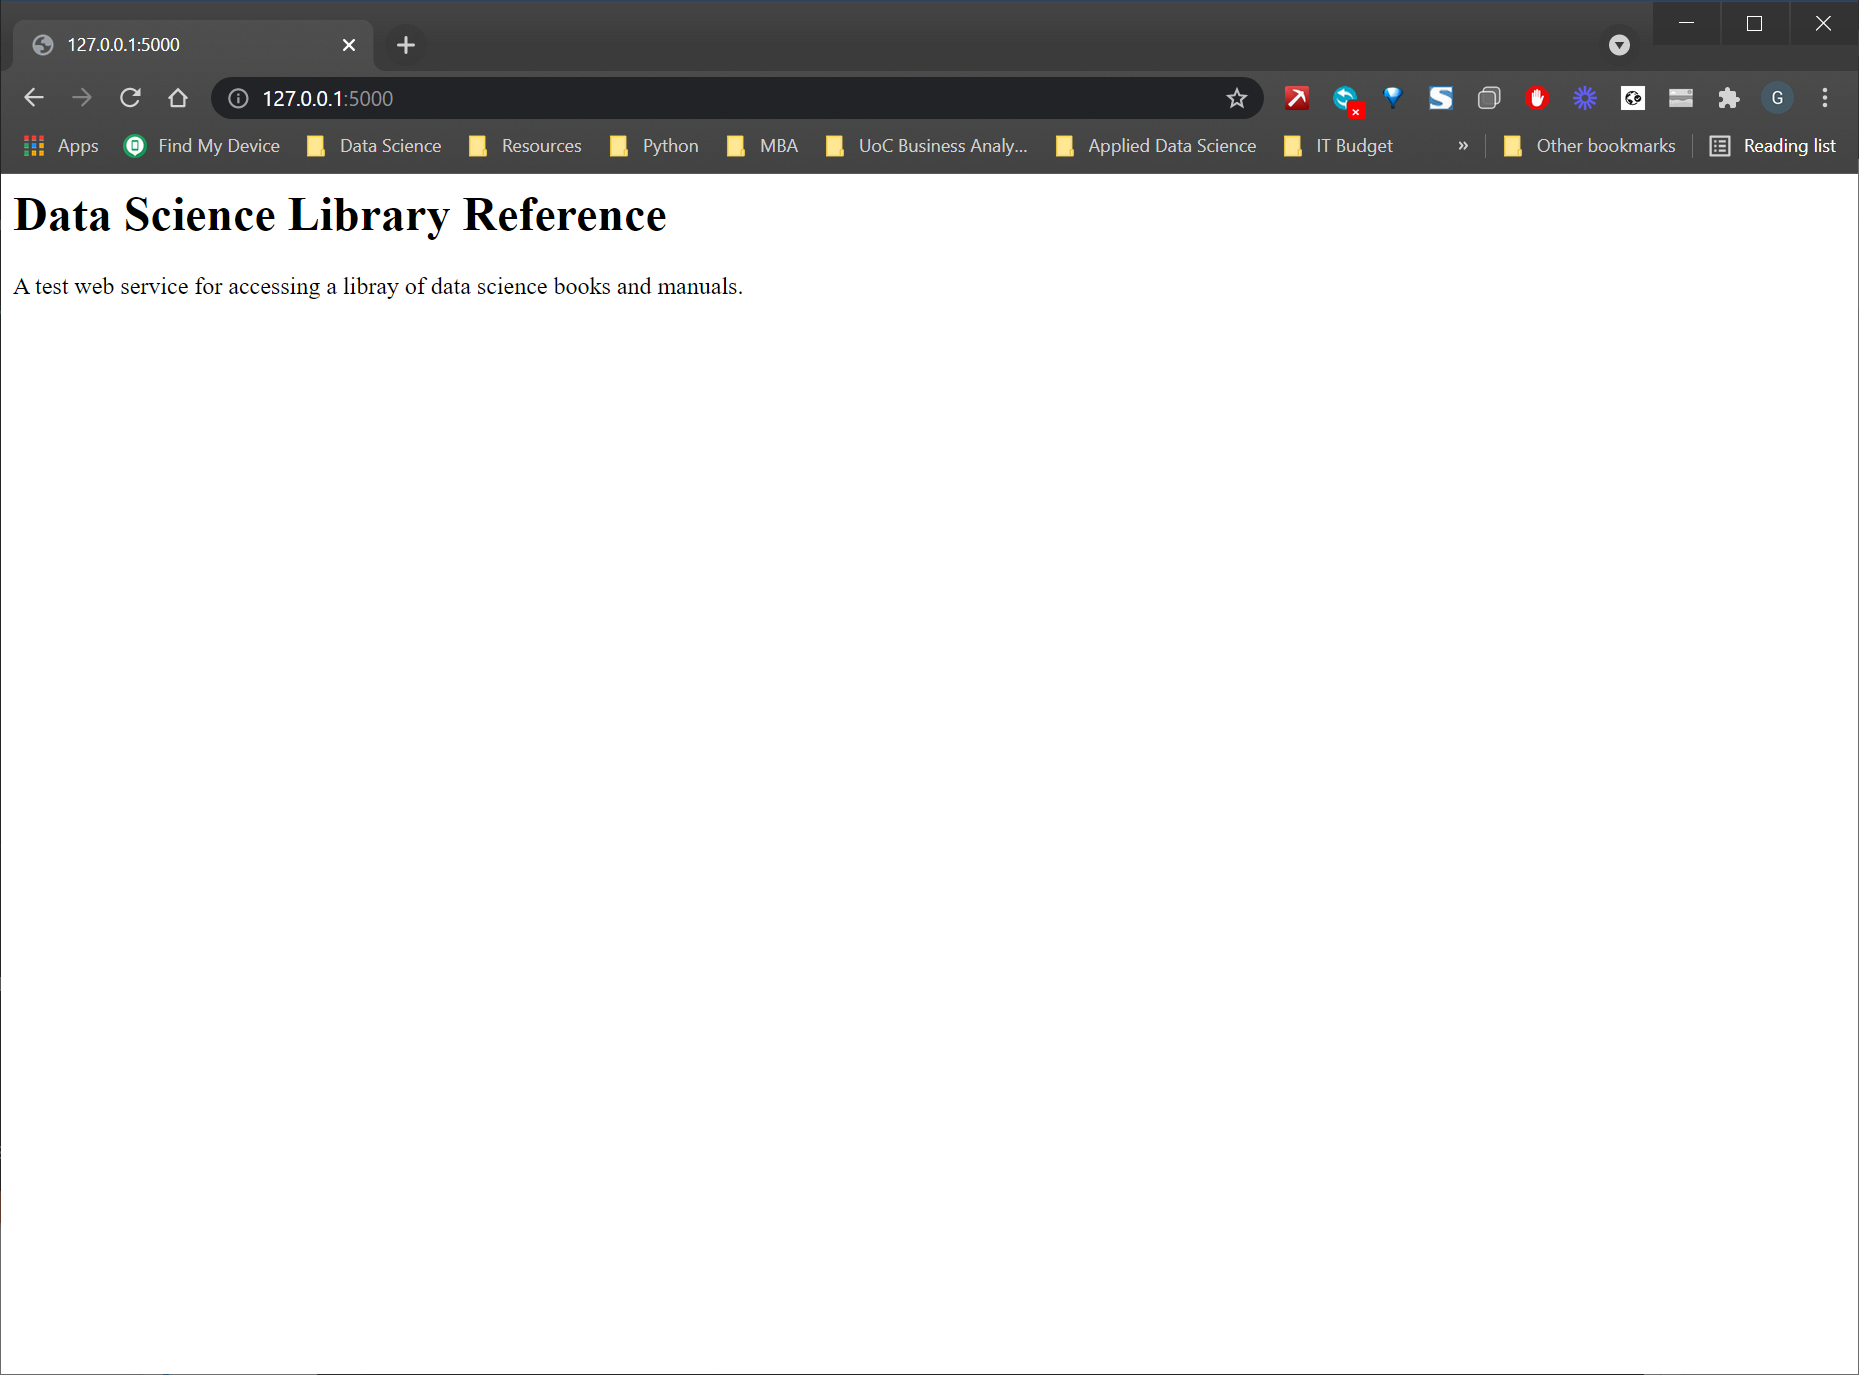

If you want to invoke the second service that returns all the data science books, go back to the web browser and amend the URL as follows -

``http://127.0.0.1:5000/api/v1/resources/books/all``

The second web service will now be invoked and paused in the debugger. Once you have stepped through the code and executed the function the json representing the library of data science manuals will be returned to the browser as output -

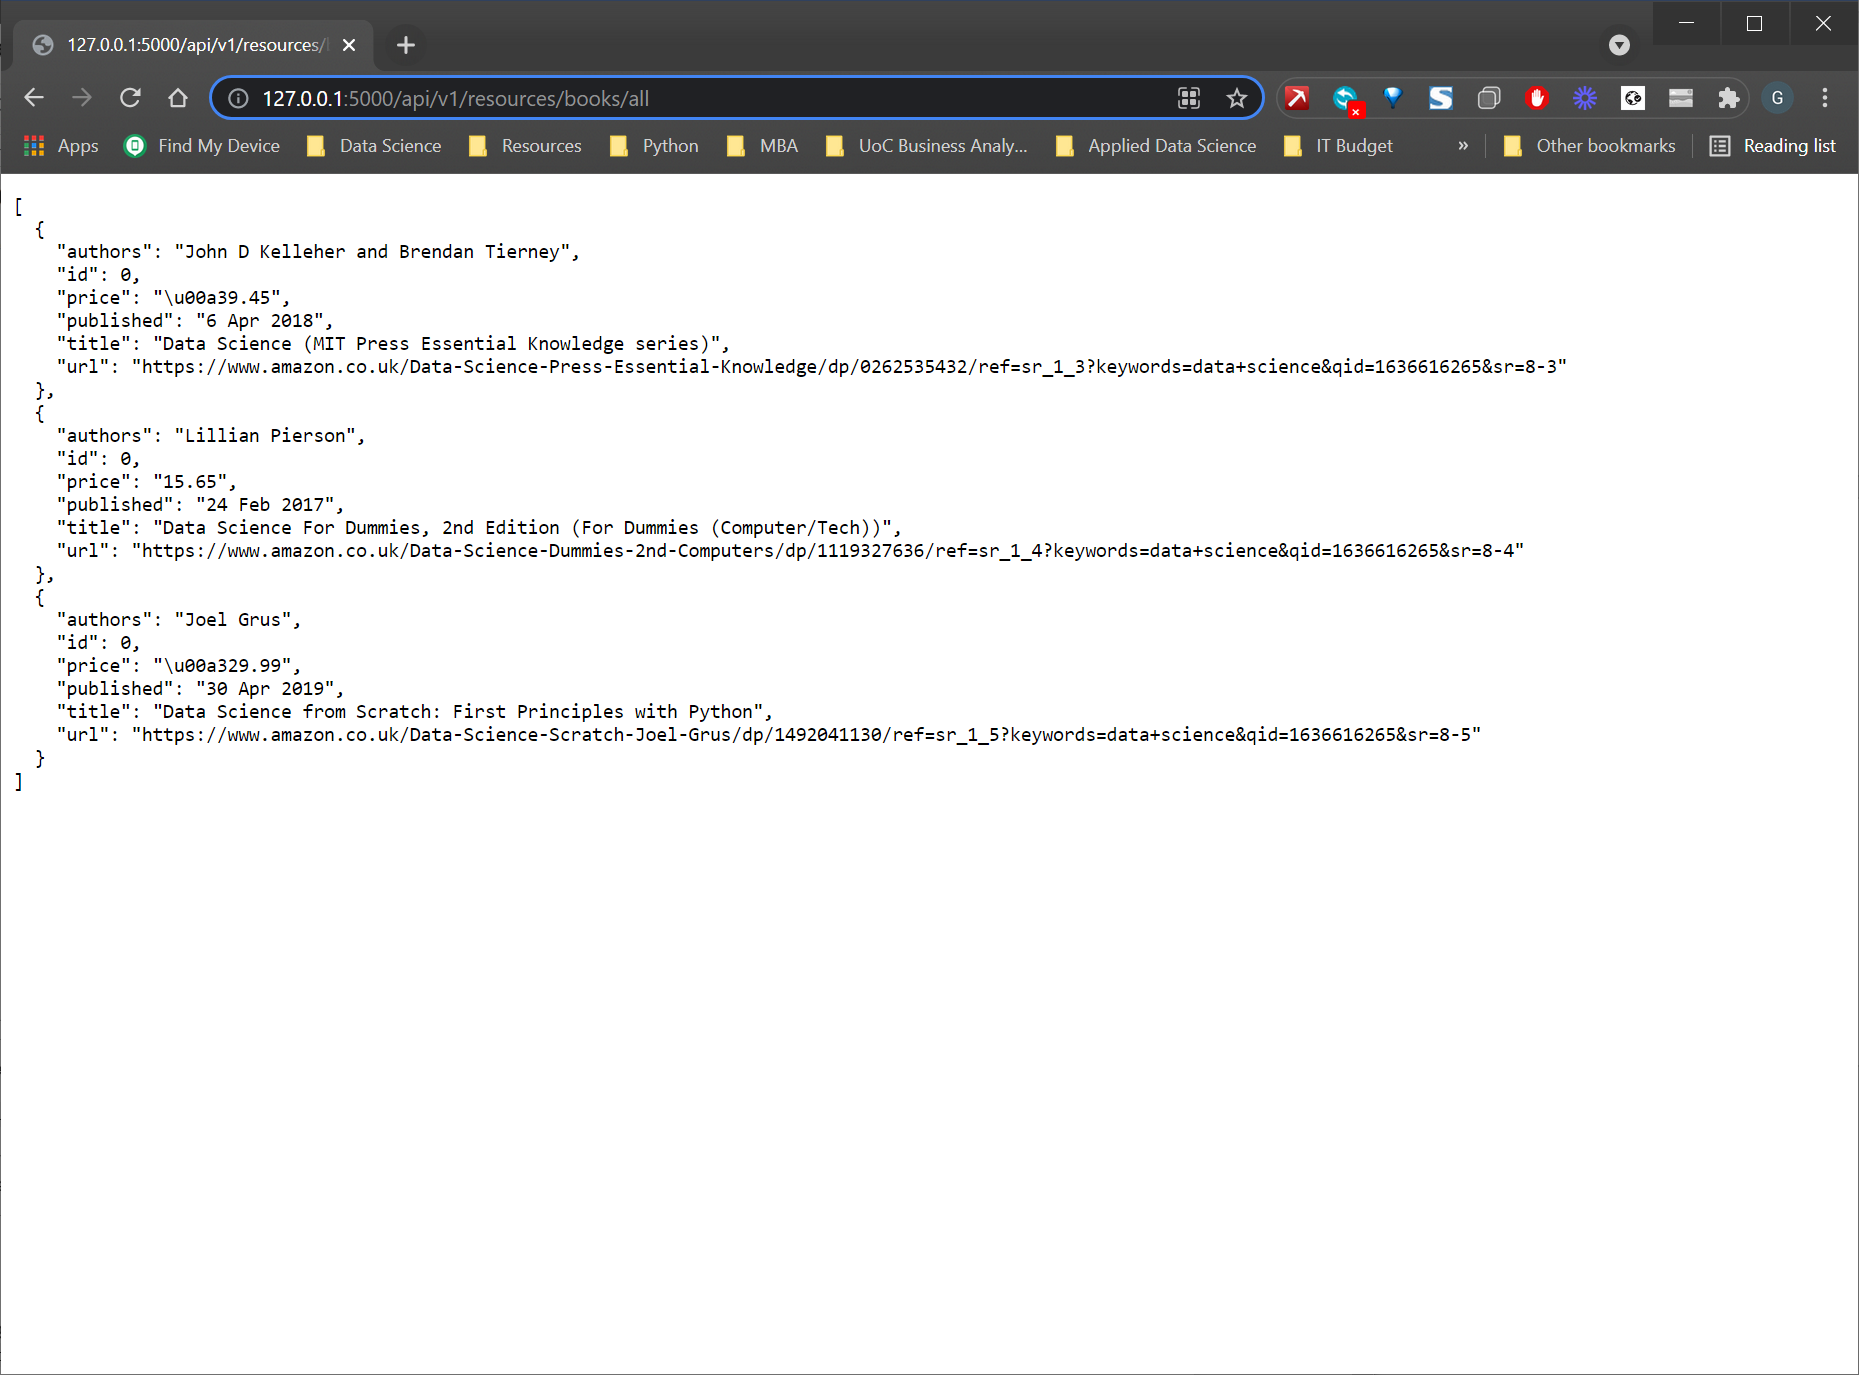

## Conclusion

Setting up debugging for flask web apps in VS Code is a little bit clunky the first time through, especially when you do not know to add the all-important ``"python.condaPath": "C:\\Users\\GHarrison\\Anaconda3"`` line to the ``launch.json`` file.

However, once it is done a single time for a web service it will just work for all subsequent sessions and the ability to be able to step through and debug a flask web application is critically important once those web services go beyond scale of the basic example given here and become real-world, complex web services.

### Thank you for reading!

If you enjoyed reading this article, why not check out my other articles at https://grahamharrison-86487.medium.com/?
Also, I would love to hear from you to get your thoughts on this piece, any of my other articles or anything else related to data science and data analytics.

If you would like to get in touch to discuss any of these topics please look me up on LinkedIn — https://www.linkedin.com/in/grahamharrison1 or feel free to e-mail me at GHarrison@lincolncollege.ac.uk.

If you would like to support the author and 1000’s of others who contribute to article writing world-wide by subscribing, please use this link — https://grahamharrison-86487.medium.com/membership (note: the author will receive a proportion of the fees if you sign up using this link).